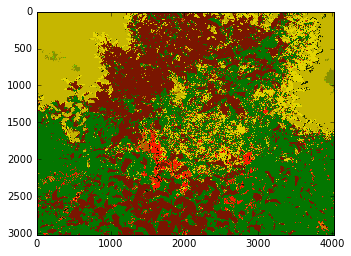

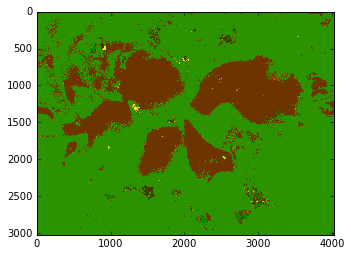

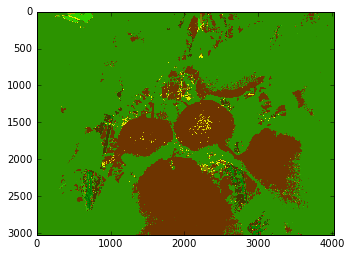

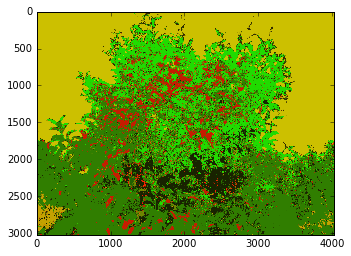

In [3]:
from __future__ import division
import copy
import os

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from scipy import misc

root_cal = './CalibratedImages/'
root_ras = './RasteredImages/'
pictures = []
_,_,files = next(os.walk(root_cal))
for file in files:
    pictures.append(data.imread(os.path.join(root_cal,file)))

for index, picture in enumerate(pictures):
    R = picture[:,:,0]
    G = picture[:,:,1]
    B = picture[:,:,2]

    #print("Begin transform")
    image = (R-B)/(R+B)
    #plt.imshow(image)
    #plt.show()
    #print(image.shape)

    mini = image.min()
    maxi = image.max()
    step = (maxi-mini)/10

    level = image.min()
    section = (image.max()-level)/10
    refined = np.zeros((3024,4032,3))

    refined[:,:,0] = 25 * (image-mini)/step
    refined[:,:,1] = 25 * 10-(image-mini)/step
    #refined[:,:,2] = 200

    '''
    print(refined[2200,1500,0])
    print(refined.shape)
    print(refined.dtype)
        
    r2 = refined.astype(np.uint8)
    print(r2[2200,1500,0])
    print(r2.shape)
    print(r2.dtype)
    
    diff = refined[r2-refined>2]
    print(len(diff))
    '''
    
    plt.imshow(refined)
    plt.show()
    #plt.imshow(r2)
    #plt.show()
    
    #misc.imsave(root_ras+str(index)+".jpg",refined)

In [13]:
from __future__ import division
import copy
import os

import matplotlib.pyplot as plt
import numpy as np
from skimage import data, color
from skimage import io, exposure, img_as_uint, img_as_float, img_as_ubyte
from scipy import misc

root_raw = './RawImages/'
root_ras = './RasteredImages/'
pictures = []
_,_,files = next(os.walk(root_raw))
for file in files:
    pictures.append(data.imread(os.path.join(root_raw,file)))

'''

shift = 20
picture2[:][:][:] += shift
picture2 = color.rgb2gray(picture2)
level = picture2.min()
section = (picture2.max()-level)/10
refined2 = np.zeros((3024,4032,3))

refined2[:,:,0] = 25 * (picture2-mini)/step
refined2[:,:,1] = 25 * 10-(picture2-mini)/step
refined2[:,:,2] = 200
plt.imshow(refined2)

print(image-(picture2+shift))

plt.show()    
'''    

for index, picture in enumerate(pictures):
    #picture += 20 #shift to adjust
    picture = color.rgb2gray(picture)

    mini = picture.min()
    maxi = picture.max()
    step = (maxi-mini)/10*255
    
    refined = np.zeros((len(picture),len(picture[0]),3))
    refined[:,:,0] = 25 * (picture-mini)/step
    refined[:,:,1] = 25 * 10-(picture-mini)/step
    refined[:,:,2] = 200
    
    r2 = refined.astype(np.uint8)
    print(r2[2200,1500,1])
    print(r2.shape)
    print(r2.dtype)
    
    plt.imsave(str(index)+'.png',refined)    

249
(3024, 4032, 3)
uint8
<class 'numpy.ndarray'>
249
(3024, 4032, 3)
uint8
<class 'numpy.ndarray'>
249
(3024, 4032, 3)
uint8
<class 'numpy.ndarray'>
249
(3024, 4032, 3)
uint8
<class 'numpy.ndarray'>
